# CIFAR-10 - Image Recognition Model

In [5]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [3]:
#import keras
import tensorflow as tf 
from tensorflow import keras
import tensorflow.keras as K
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

import pandas as pd
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
#from keras.utils import np_utils
from keras import utils as np_utils
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
pd.set_option('display.max_columns',None)#displaying long list of columns
pd.set_option('display.max_rows', None)#displaying long list of rows
pd.set_option('display.width', 1000)#width of window

In [7]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 4.3 MB/s 


In [8]:
import visualkeras
import pandas as pd

# Loading the data

In [9]:

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))
# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

170498071/170498071 [==============================] - 2s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


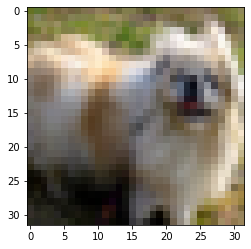

In [10]:
plt.imshow(x_train[40])

# Experimenting with models 

## 1. Experiment with CNN model
## 2. Experiment with multi-layer fully connected feed forward NN
## 3. Experiment with the Dropout rates

## Model 1

In [ ]:
batch_size = 16
num_classes = 10
epochs = 40
#data_augmentation = True
num_predictions = 20

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #dropout rate 50%
model.add(Dense(num_classes))
model.add(Activation('softmax'))



# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history5=model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))


Epoch 1/50
1563/1563 [==============================] - 17s 5ms/step - loss: 1.5325 - accuracy: 0.4375 - val_loss: 1.1566 - val_accuracy: 0.5976
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1460 - accuracy: 0.5910 - val_loss: 1.0145 - val_accuracy: 0.6446
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9904 - accuracy: 0.6531 - val_loss: 0.8568 - val_accuracy: 0.7018
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8963 - accuracy: 0.6859 - val_loss: 0.8277 - val_accuracy: 0.7176
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8319 - accuracy: 0.7079 - val_loss: 0.7444 - val_accuracy: 0.7439
Epoch 6/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7834 - accuracy: 0.7257 - val_loss: 0.7477 - val_accuracy: 0.7386
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7437 - accuracy: 0.7391 - val_loss: 0.7014 - val_accuracy

In [ ]:
evaluation = model.evaluate(x_test, y_test_cat)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.7948
Test Loss: 0.6868305206298828
Test Accuracy: 0.7947999835014343


In [ ]:
history = history5

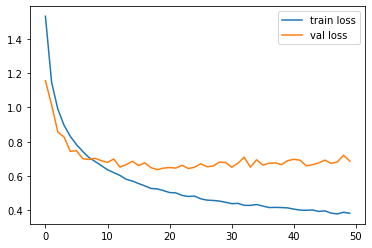

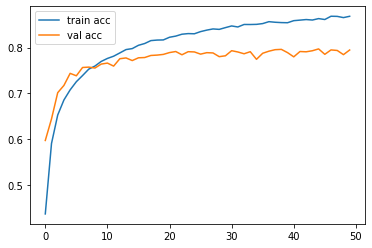

In [ ]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Model 2

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))  #dropout rate 50%
model2.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history=model2.fit(x_train,y_train_cat,epochs=40,validation_data=(x_test,y_test_cat))

Epoch 1/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4587 - accuracy: 0.4965 - val_loss: 1.0367 - val_accuracy: 0.6265
Epoch 2/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0166 - accuracy: 0.6440 - val_loss: 0.8266 - val_accuracy: 0.7128
Epoch 3/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8807 - accuracy: 0.6946 - val_loss: 0.7516 - val_accuracy: 0.7378
Epoch 4/40
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7939 - accuracy: 0.7258 - val_loss: 0.8992 - val_accuracy: 0.6867
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7300 - accuracy: 0.7495 - val_loss: 0.6845 - val_accuracy: 0.7585
Epoch 6/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6843 - accuracy: 0.7643 - val_loss: 0.6934 - val_accuracy: 0.7566
Epoch 7/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6426 - accuracy: 0.7786 - val_loss: 0.6458 - val_ac

In [ ]:
evaluation = model2.evaluate(x_test, y_test_cat)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.5312 - accuracy: 0.8370
Test Loss: 0.5311524271965027
Test Accuracy: 0.8370000123977661


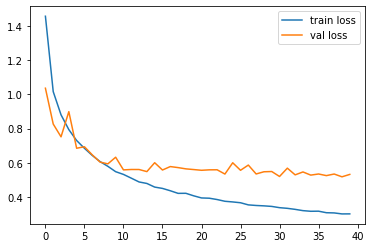

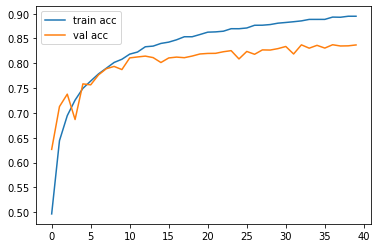

In [ ]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Model 3

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))  #dropout rate 50%
model3.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history6=model3.fit(x_train,y_train_cat,epochs=40,validation_data=(x_test,y_test_cat))

Epoch 1/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4307 - accuracy: 0.5076 - val_loss: 1.0678 - val_accuracy: 0.6323
Epoch 2/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0151 - accuracy: 0.6457 - val_loss: 0.8681 - val_accuracy: 0.6973
Epoch 3/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8880 - accuracy: 0.6915 - val_loss: 0.7719 - val_accuracy: 0.7307
Epoch 4/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8032 - accuracy: 0.7226 - val_loss: 0.8894 - val_accuracy: 0.6832
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7391 - accuracy: 0.7438 - val_loss: 0.6417 - val_accuracy: 0.7738
Epoch 6/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6913 - accuracy: 0.7635 - val_loss: 0.6497 - val_accuracy: 0.7745
Epoch 7/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6532 - accuracy: 0.7750 - val_loss: 0.6803 - val_ac

In [ ]:
evaluation = model3.evaluate(x_test, y_test_cat)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.5945 - accuracy: 0.8167
Test Loss: 0.5944544076919556
Test Accuracy: 0.8166999816894531


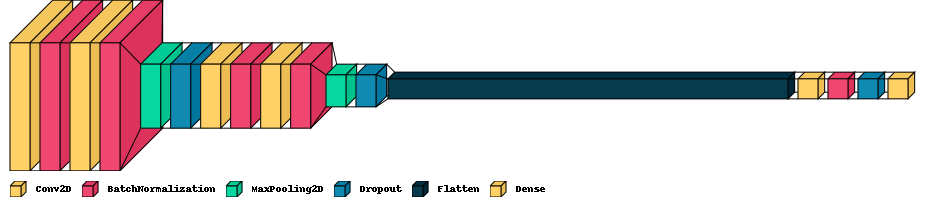

In [ ]:
visualkeras.layered_view(model3, legend=True)

In [ ]:
history = history6

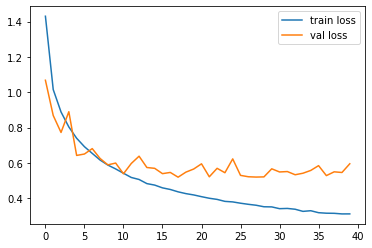

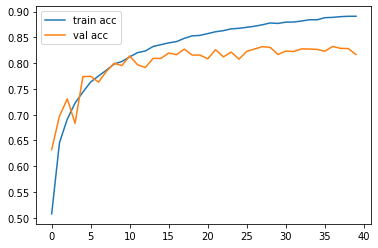

In [ ]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Model 4

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.3))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history7=model4.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5944 - accuracy: 0.4450 - val_loss: 1.1115 - val_accuracy: 0.5971
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0906 - accuracy: 0.6156 - val_loss: 0.9914 - val_accuracy: 0.6511
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9091 - accuracy: 0.6834 - val_loss: 0.7834 - val_accuracy: 0.7233
Epoch 4/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8041 - accuracy: 0.7233 - val_loss: 0.6644 - val_accuracy: 0.7690
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7310 - accuracy: 0.7504 - val_loss: 0.7201 - val_accuracy: 0.7518
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6666 - accuracy: 0.7722 - val_loss: 0.6654 - val_accuracy: 0.7736
Epoch 7/50
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6229 - accuracy: 0.7869 - val_loss: 0.5890 - val_a

In [ ]:
evaluation = model4.evaluate(x_test, y_test_cat)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4358 - accuracy: 0.8660
Test Loss: 0.4357801675796509
Test Accuracy: 0.8659999966621399


In [ ]:
history = history7

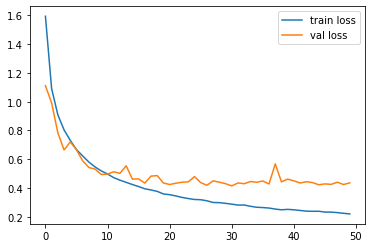

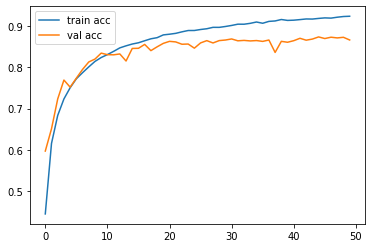

In [ ]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


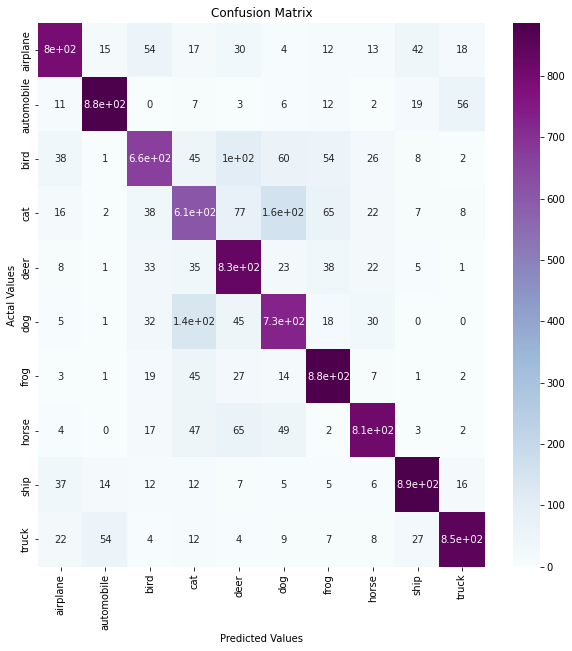

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_preds = model.predict(x_test)
y_pred=y_preds.argmax(axis=1)
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=class_names,
       columns=class_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True,cmap='BuPu')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
train_images = x_train

1/1 [==============================] - 0s 15ms/step


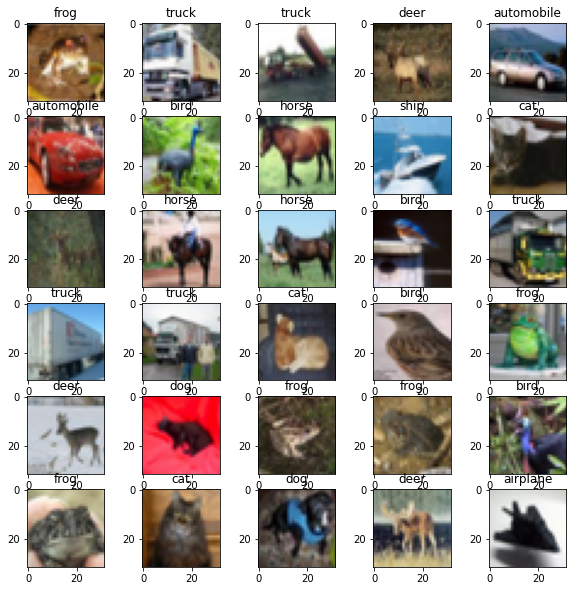

In [ ]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(train_images[i])
    img = train_images[i]
    img = np.expand_dims(img, axis=0)    
    pred=  model4.predict(img)
    pred=np.argmax(pred,axis=1)
    plt.title(rev_labels[pred[0]])

# Model 5 

In [19]:
input_t = K.Input(shape=(32,32,3))
xception_model = K.applications.Xception(include_top=False,
                                    weights="imagenet",
                                    input_tensor=input_t)

In [20]:
# In this case, we ‘freeze’ all layers except for the last few block of the Exception.

for layer in xception_model.layers[:75]:
  layer.trainable=False

In [21]:
# We can check that we did it correctly with:
# False means that the layer is ‘freezed’ or is not trainable and 
# True that when we run our model, the weights are going to be adjusted.

for i, layer in enumerate(xception_model.layers):
  print(i,layer.name,"-",layer.trainable)

0 input_2 - False
1 block1_conv1 - False
2 block1_conv1_bn - False
3 block1_conv1_act - False
4 block1_conv2 - False
5 block1_conv2_bn - False
6 block1_conv2_act - False
7 block2_sepconv1 - False
8 block2_sepconv1_bn - False
9 block2_sepconv2_act - False
10 block2_sepconv2 - False
11 block2_sepconv2_bn - False
12 conv2d_4 - False
13 block2_pool - False
14 batch_normalization_10 - False
15 add_12 - False
16 block3_sepconv1_act - False
17 block3_sepconv1 - False
18 block3_sepconv1_bn - False
19 block3_sepconv2_act - False
20 block3_sepconv2 - False
21 block3_sepconv2_bn - False
22 conv2d_5 - False
23 block3_pool - False
24 batch_normalization_11 - False
25 add_13 - False
26 block4_sepconv1_act - False
27 block4_sepconv1 - False
28 block4_sepconv1_bn - False
29 block4_sepconv2_act - False
30 block4_sepconv2 - False
31 block4_sepconv2_bn - False
32 conv2d_6 - False
33 block4_pool - False
34 batch_normalization_12 - False
35 add_14 - False
36 block5_sepconv1_act - False
37 block5_sepconv1 -

In [22]:
to_res = (32, 32)
model = K.models.Sequential()
model.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
model.add(xception_model)
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(256, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dropout(0.7))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(10, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',
                  optimizer = "adam",
                  metrics=['accuracy'])
final_model = model.fit(x_train, y_train_cat, batch_size=35, epochs=11, verbose=1, validation_data=(x_test,y_test_cat))
model.summary()
#model4.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/11
1429/1429 [==============================] - 50s 26ms/step - loss: 1.8680 - accuracy: 0.3471 - val_loss: 1.7881 - val_accuracy: 0.5177
Epoch 2/11
1429/1429 [==============================] - 39s 27ms/step - loss: 1.3056 - accuracy: 0.5613 - val_loss: 1.0409 - val_accuracy: 0.6551
Epoch 3/11
1429/1429 [==============================] - 37s 26ms/step - loss: 1.1639 - accuracy: 0.6342 - val_loss: 0.9513 - val_accuracy: 0.6894
Epoch 4/11
1429/1429 [==============================] - 37s 26ms/step - loss: 1.0580 - accuracy: 0.6718 - val_loss: 0.9270 - val_accuracy: 0.6807
Epoch 5/11
1429/1429 [==============================] - 37s 26ms/step - loss: 0.9797 - accuracy: 0.6975 - val_loss: 0.8342 - val_accuracy: 0.7224
Epoch 6/11
1429/1429 [==============================] - 38s 26ms/step - loss: 0.8904 - accuracy: 0.7260 - val_loss: 0.8443 - val_accuracy: 0.7250
Epoch 7/11
1429/1429 [==============================] - 37s 26ms/step - loss: 0.8294 - accuracy: 0.7449 - val_loss: 0.7621 -

In [25]:
evaluation = model.evaluate(x_test, y_test_cat)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 4s 13ms/step - loss: 1.3094 - accuracy: 0.6556
Test Loss: 1.309372901916504
Test Accuracy: 0.6556000113487244


In [26]:
history = final_model

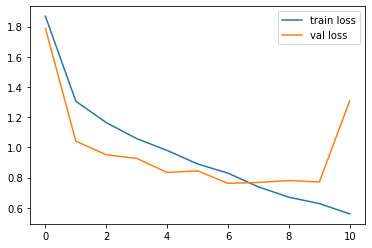

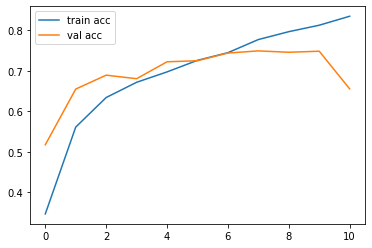

In [27]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Team contribution

# Model 1 - Anuja
# Model 2 - Vaibhav
# Model 3 - Danial 
# Model 4 - Dorien
# Model 5 - Shehjar